In [24]:
#HW3
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import math
import operator
from sklearn import preprocessing

# 1 Theory

In [25]:
#PCA
X=np.array([[-2,1],[-5,-4],[-3,1],[0,3],[-8,11],[-2,5],[1,0],[5,-1],[-1,-3],[6,1]])
N=X.shape[0]
X = (X - X.mean(axis = 0))/X.std(axis = 0)
cov=X.T@X/(N-1)
print(cov)
eigVals,eigVects=np.linalg.eig(cov)
print(eigVals)
print(eigVects)


[[ 1.11111111 -0.45362464]
 [-0.45362464  1.11111111]]
[1.56473576 0.65748647]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [26]:
#normlize
v=np.sqrt(eigVects[0,0]**2+eigVects[1,0]**2)
w=np.array([eigVects[0,0]/v,eigVects[1,0]/v])
print(w)

[ 0.70710678 -0.70710678]


In [27]:
Z=X@w
print(Z)

[-0.12415175  0.21897859 -0.30043335 -0.1203786  -2.92579161 -0.82173185
  0.57908807  1.4586095   0.74970996  1.28610104]


In [28]:
#LDA
X = np.array([[-2,1], [-5,-4], [-3,1],[0,3],[-8,11],[-2,5], [1,0], [5,-1],[-1,-3],[6,1]])
print(np.shape(X))

mean=np.mean(X,axis=0)
std=np.std(X,axis=0,ddof=1)
print(mean)
print(std)
X=(X-mean)/std
print(X)

(10, 2)
[-0.9  1.4]
[4.22821213 4.27395211]
[[-0.26015724 -0.09359019]
 [-0.96967699 -1.2634676 ]
 [-0.49666382 -0.09359019]
 [ 0.21285592  0.37436077]
 [-1.67919674  2.24616461]
 [-0.26015724  0.84231173]
 [ 0.44936251 -0.32756567]
 [ 1.39538884 -0.56154115]
 [-0.02365066 -1.02949211]
 [ 1.63189542 -0.09359019]]


In [29]:
X1mean=np.mean(X[:5,:],axis=0)
X1=X[:5,:]-X1mean
print(X1)

[[ 0.37841053 -0.32756567]
 [-0.33110922 -1.49744308]
 [ 0.14190395 -0.32756567]
 [ 0.8514237   0.14038529]
 [-1.04062896  2.01218913]]


In [30]:
X2mean=np.mean(X[5:,:],axis=0)
X2=X[5:,:]-X1mean
print(X2)

[[ 0.37841053  0.60833625]
 [ 1.08793028 -0.56154115]
 [ 2.03395661 -0.79551663]
 [ 0.61491711 -1.2634676 ]
 [ 2.27046319 -0.32756567]]


In [31]:
cov1=4*(X1.T@X1/4)
print(cov1)
cov2=4*(X2.T@X2/4)
print(cov2)
Sw=cov1+cov2
print(Sw)

[[ 2.08079553 -1.64903489]
 [-1.64903489  6.52554745]]
[[10.99689248 -3.51941675]
 [-3.51941675  3.02189781]]
[[13.077688   -5.16845164]
 [-5.16845164  9.54744526]]


In [32]:
X1meanvec=X1mean.reshape(2,1)
X2meanvec=X2mean.reshape(1,2)
Sb=X1meanvec@X2meanvec
print(Sb)

[[-0.4077688   0.1494092 ]
 [ 0.1494092  -0.05474453]]


In [33]:
A=np.linalg.inv(Sw)@Sb
e,v=np.linalg.eig(A)
print(e)
print(v)

[-3.12255781e-02  1.30104261e-18]
[[-0.99879099 -0.34403943]
 [-0.04915855 -0.9389552 ]]


In [34]:
#normlize
m=np.sqrt(v[0,0]**2+v[1,0]**2)
w=np.array([v[0,0]/m,v[1,0]/m])
print(w)

[-0.99879099 -0.04915855]


In [35]:
X1_trans=X1@w
X2_trans=X2@w
print(X1_trans)
print(X2_trans)

[-0.36185038  0.40432103 -0.12562973 -0.85729545  0.94045453]
[-0.40785796 -1.05901041 -1.99239109 -0.55206344 -2.25161552]


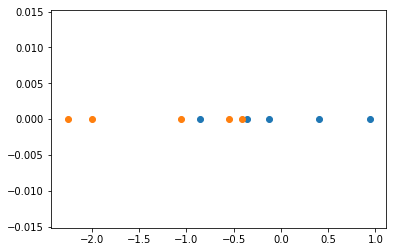

In [36]:
y=[0,0,0,0,0]
plt.scatter(X1_trans,y)
plt.scatter(X2_trans,y)

# 2  Dimensionality Reduction via PCA

people.images.shape:(3023, 87, 65)
Number of classes:62


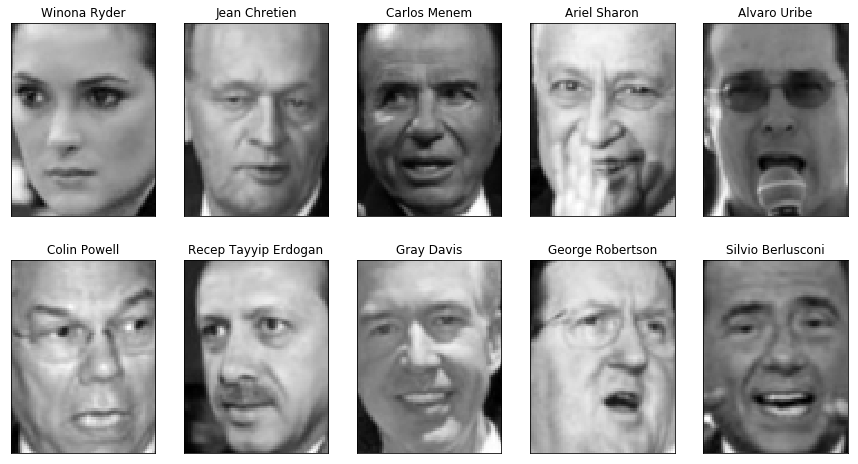

In [37]:

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7, download_if_missing=True)
image_shape=people.images[0].shape

fig,axes=plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})

for target, image, ax in zip(people.target,people.images,axes.ravel()):
    ax.imshow(image,cmap=cm.gray)
    ax.set_title(people.target_names[target])

print("people.images.shape:{}".format(people.images.shape))
print("Number of classes:{}".format(len(people.target_names)))

In [38]:
# count how often each target appears 
counts = np.bincount(people.target)
# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)): 
    print("{0:25} {1:3}".format(name, count), end='')
    if (i + 1) % 3 == 0:
        print ()

Alejandro Toledo           39Alvaro Uribe               35Amelie Mauresmo            21
Andre Agassi               36Angelina Jolie             20Ariel Sharon               77
Arnold Schwarzenegger      42Atal Bihari Vajpayee       24Bill Clinton               29
Carlos Menem               21Colin Powell              236David Beckham              31
Donald Rumsfeld           121George Robertson           22George W Bush             530
Gerhard Schroeder         109Gloria Macapagal Arroyo    44Gray Davis                 26
Guillermo Coria            30Hamid Karzai               22Hans Blix                  39
Hugo Chavez                71Igor Ivanov                20Jack Straw                 28
Jacques Chirac             52Jean Chretien              55Jennifer Aniston           21
Jennifer Capriati          42Jennifer Lopez             21Jeremy Greenstock          24
Jiang Zemin                20John Ashcroft              53John Negroponte            31
Jose Maria Aznar           23Jua

In [39]:
mask = np.zeros(people.target.shape, dtype=np.bool) 
for target in np.unique(people.target):
    mask[np.where(people.target == target )[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
# scale the grayscale values to be between 0 and 1 
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.

print(np.shape(X_people))

(2063, 5655)


In [40]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_people,y_people,stratify=y_people , random_state=0)
# build a KNeighborsClassifier using one neighbor 
knn = KNeighborsClassifier ( n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1−nn: {:.2f}".format(knn.score(X_test, y_test)))
print(X_people.shape)
m,n=np.shape(X_train)
p,q=np.shape(X_test)


Test set score of 1−nn: 0.23
(2063, 5655)


In [41]:
print(X_train.shape)
print(np.shape(X_test))
print(np.shape(y_train))
print(y_test.shape)
print(type(X_train))

(1547, 5655)
(516, 5655)
(1547,)
(516,)
<class 'numpy.ndarray'>


In [42]:
# Q2.1(knn)

#KNN algorithm
def KNN(test, data_train, data_labels, k):
    if k <= 0:
        return None
    pre  = np.zeros([test.shape[0]], int)
    for i in range(test.shape[0]):
        diff         = np.tile(test[i], (data_train.shape[0], 1)) - data_train
        sqdiff       = diff ** 2
        sqdistance   = sqdiff.sum(axis=1)
        sortdistance = sqdistance.argsort()
        Count        = {}
        for j in range(k):
            label        = data_labels[sortdistance[j]]
            Count[label] = Count.get(label, 0) + 1
        maxx         = 0
        index        = -1
        for key in Count:
            if Count[key] > maxx:
                maxx  = Count[key]
                index = key
        pre[i] = index
    return pre

def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x] == predictions[x]:
            correct += 1
    return round((correct/float(len(testSet))) * 100.0, 3)

############################
# Q2.2
predict = KNN(X_test, X_train, y_train, 1)
acc=getAccuracy(y_test,predict)
print(acc)

23.256


In [43]:
# Q2.3
def standardizeData(data):
    _mean = np.mean(data, axis=0)
    _std = np.std(data, axis = 0)
    return (data - _mean) / _std

standar_X = standardizeData(X_people)

In [44]:
###########################
# Q2.4
def pca(X, topNfeat = 100):
    X -= np.mean(X, axis=0)
    cov = np.dot(X.T, X) / X.shape[0]
    U,S,V = np.linalg.svd(cov)
#     xRot = np.dot(X, U[:, :topNfeat])
    pca_X = np.dot(X, U[:, :topNfeat])
    pca_whitenX =  pca_X * (np.diag(1./np.sqrt(np.diag(S[:topNfeat]) + 1e-5)))
    return pca_X, pca_whitenX

pca_X, pca_whitenX = pca(standar_X)
# print(np.shape(pca_X), np.shape(pca_whitenX))

In [45]:
# Q2.5(pca)
X_train, X_test, y_train, y_test = train_test_split(pca_X, y_people, stratify=y_people , random_state=0)
predict = KNN(X_test, X_train, y_train, 1)
acc=getAccuracy(y_test,predict)
print(acc)

25.775


In [46]:
# Q2.6（Whiten）
X_train, X_test, y_train, y_test = train_test_split(pca_whitenX, y_people, stratify=y_people , random_state=0)
predict = KNN(X_test, X_train, y_train, 1)
acc=getAccuracy(y_test,predict)
print(acc)

35.465


In [47]:
###########################
# Q2.7
pca_X = pca(standar_X, 2)[0]
# print(pca_X)

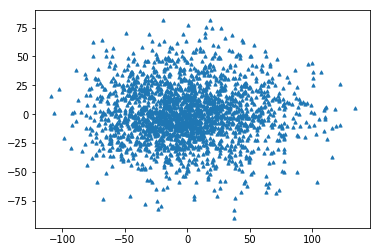

In [48]:
###########################
# Q2.8
def visualize2D(data):
    fig1 = plt.figure()
    ax = fig1.add_subplot(111)
    ax.scatter(data[:,0], data[:,1], marker='^',  s = 10)
    plt.show()

visualize2D(pca_X)

#  3 Eigenfaces

In [49]:
# Q3.1
X_train, X_test, y_train, y_test = train_test_split(X_people,y_people,stratify=y_people , random_state=0)

In [50]:
# Q3.2
X_norm = standardizeData(X_train)

In [51]:
# Q3.3
pca_X, recon_Z = pca(X_norm)

In [52]:
# Q3.4
pc1_min=np.where(pca_X==min(pca_X[:,0]))[0][0]
label=y_train[pc1_min]
name=people.target_names[label]
print(name)

George Robertson


pc1_min: George Robertson


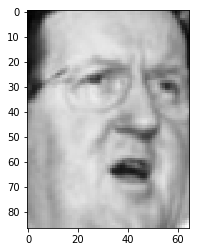

In [53]:
pc1_min_image=np.where(people.target==label)[0][0]
plt.imshow(people.images[pc1_min_image],cmap=cm.gray)
ax.set_title(name)
print("pc1_min: George Robertson")

In [54]:
pc1_max=np.where(pca_X==max(pca_X[:,0]))[0][0]
label=y_train[pc1_max]
name=people.target_names[label]
print(name)

Kofi Annan


pc1_max: Kofi Annan


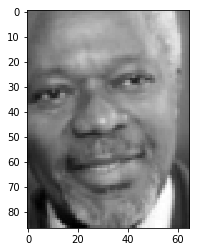

In [55]:
pc1_max_image=np.where(people.target==label)[0][0]
plt.imshow(people.images[pc1_max_image],cmap=cm.gray)
ax.set_title(name)
print("pc1_max: Kofi Annan")

In [56]:
pc2_min=np.where(pca_X==max(pca_X[:,1]))[0][0]
label=y_train[pc2_min]
name=people.target_names[label]
print(name)

George W Bush


pc2_min: George W Bush


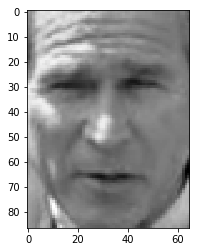

In [57]:
pc2_min_image=np.where(people.target==label)[0][0]
plt.imshow(people.images[pc2_min_image],cmap=cm.gray)
ax.set_title(name)
print("pc2_min: George W Bush")

In [58]:
pc2_max=np.where(pca_X==min(pca_X[:,1]))[0][0]
label=y_train[pc2_max]
name=people.target_names[label]
print(name)

Guillermo Coria


pc2_max: Guillermo Coria


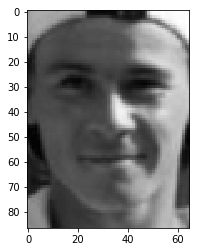

In [59]:
pc2_max_image=np.where(people.target==label)[0][0]
plt.imshow(people.images[pc2_max_image],cmap=cm.gray)
ax.set_title(name)
print("pc2_max: Guillermo Coria")

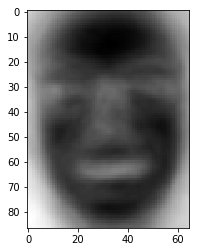

In [60]:
# Q3.5

def showPCA1(X):
    X -= np.mean(X, axis=0)
    cov = np.dot(X.T, X) / X.shape[0]
    U,S,V = np.linalg.svd(cov)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(U[:, 0].reshape(87, 65), cmap=cm.gray)

showPCA1(X_norm)

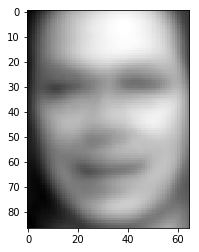

In [61]:
##########################
# Q3.6

def recon(X, k=2):
    _mean = np.mean(X, axis=0)
    X -= _mean
    cov = np.dot(X.T, X) / X.shape[0]
    U,S,V = np.linalg.svd(cov)
    Z = np.dot(X, U[:, :k])
    reconX = np.dot(Z, U[:, :k].T)
    return reconX

reconX = recon(X_norm) * np.std(X_train, axis=0) + np.mean(X_train, axis=0)
firstPerson = reconX[0, :]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(firstPerson.reshape(87, 65), cmap=cm.gray)

In [62]:
# Q3.7

def pca_ratio(X, ratio=0.95):
    _mean = np.mean(X, axis=0)
    X -= _mean
    cov = np.dot(X.T, X) / X.shape[0]
    U,S,V = np.linalg.svd(cov)
    n = np.shape(U)[0]
    for k in range(n):
        if np.sum(S[:k]) / np.sum(S) >= ratio:
            Z = np.dot(X, U[:, :k])
            reconX = np.dot(Z, U[:, :k].T)
            return reconX

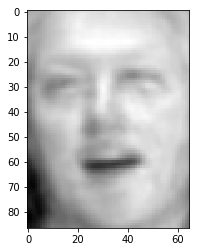

In [63]:
# Q3.8

reconX = pca_ratio(X_norm) * np.std(X_train, axis=0) + np.mean(X_train, axis=0)
firstPerson = reconX[0, :]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(firstPerson.reshape(87, 65), cmap=cm.gray)

# 4 Clustering

In [64]:
#############################
# Q4.1

from numpy import *

def distE(vecA,vecB):
    return sqrt(sum(power(vecA-vecB,2)))

def randCent(dataSet,k):
    np.random.seed(0)
    m,n = dataSet.shape
    centroids = np.zeros((k,n))
    for i in range(k):
        index = int(np.random.uniform(0,m))
        centroids[i,:] = dataSet[index,:]
    return centroids
    
def kmeans(dataSet,k,disMea=distE,createCent=randCent):
    m = shape(dataSet)[0]
    clusterA= mat(zeros((m,2)))
    centriods = createCent(dataSet,k)
    clusterC=True
    while clusterC:
        clusterC=False
        for i in range(m):
            minDist = inf
            minIndex = -1
            for j in range(k):
                distJI = disMea(centriods[j,:],dataSet[i,:])
                if distJI<minDist:
                    minDist=distJI;minIndex=j
            if clusterA[i,0] != minIndex:
                clusterC = True

            clusterA[i,:] = minIndex,minDist**2

        for cent in range(k):
            ptsInClust = dataSet[nonzero(clusterA[:, 0].A == cent)[0]]
            centriods[cent, :] = mean(ptsInClust, axis=0)
    return centriods,clusterA

In [65]:
#############################
# Q4.2

kmeans_X = standardizeData(X_people)

In [66]:
#############################
# Q4.3

def pca_recon(X, k=100):
    _mean = np.mean(X, axis=0)
    X -= _mean
    cov = np.dot(X.T, X) / X.shape[0]
    U,S,V = np.linalg.svd(cov)
    Z = np.dot(X, U[:, :k])
    return Z, U[:, :k]

pca_X, Uk = pca_recon(kmeans_X, 100)

In [67]:
#############################
# Q4.4

myCentroids, clusterAssment = kmeans(pca_X, 10)

In [68]:
#############################
# Q4.5

for i in range(10):
    print("number of %d-th: %d" % (i, sum(clusterAssment[:,0] == i)))

number of 0-th: 231
number of 1-th: 207
number of 2-th: 154
number of 3-th: 152
number of 4-th: 159
number of 5-th: 283
number of 6-th: 204
number of 7-th: 261
number of 8-th: 255
number of 9-th: 157


(10, 100)


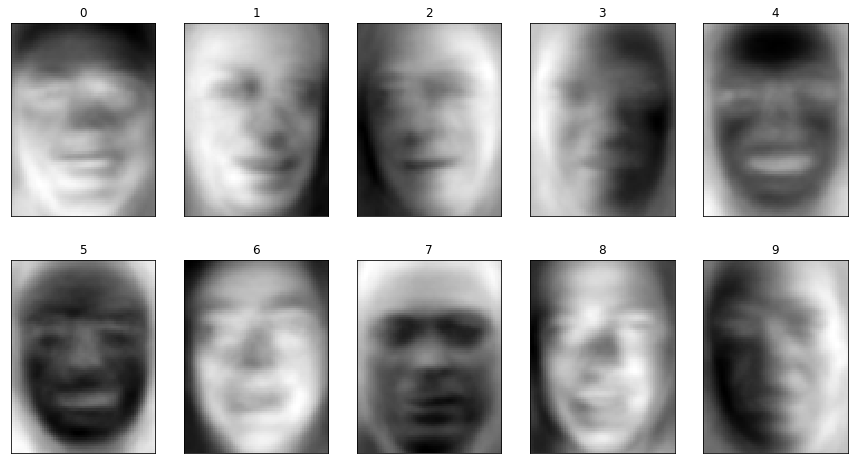

In [69]:
#############################
# Q4.6
print(np.shape(myCentroids))
recon_center = np.dot(myCentroids, Uk.T)

fig,axes=plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
target = [i for i in range(10)]
for tt, image, ax in zip(target, recon_center, axes.ravel()):
    ax.imshow(image.reshape(87, 65), cmap=cm.gray)
    ax.set_title(str(tt))

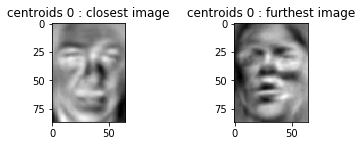

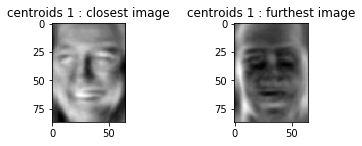

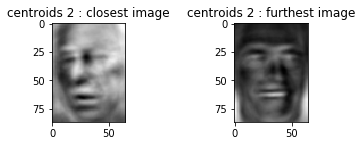

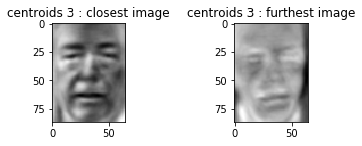

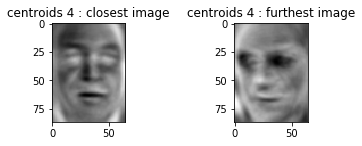

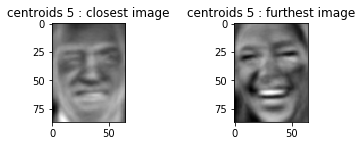

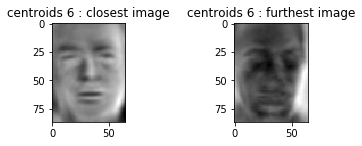

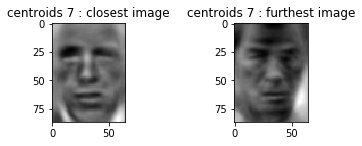

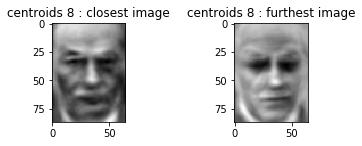

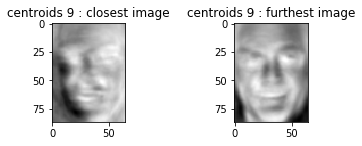

In [70]:
#############################
# Q4.7

def findImage(X, clusterAss, center):
    closest, furthest = 0, 0
    for i in range(np.shape(clusterAss)[0]):
        d1 = np.sqrt(np.sum(np.square(X[clusterAss[i],:] - center)))
        dc = np.sqrt(np.sum(np.square(X[closest, :] - center)))
        df = np.sqrt(np.sum(np.square(X[furthest, :] - center)))
        if d1 < dc:
            closest = i
        if d1 > df:
            furthest = i
    return closest, furthest

def plotFigure(image1, image2, i):
    fig = plt.figure()
    ax = fig.add_subplot(221)
    ax.imshow(image1.reshape(87, 65), cmap=cm.gray)
    ax.set_title("centroids %d : closest image" % i)
    ax = fig.add_subplot(222)
    ax.imshow(image2.reshape(87, 65), cmap=cm.gray)
    ax.set_title("centroids %d : furthest image" % i)
    
def show(centroids, Uk, cluAss):
    for i in range(np.shape(centroids)[0]):
        closest, furthest = findImage(pca_X, np.where(cluAss[:, 0] == i)[0], centroids[i, :])
        recon_closest = np.dot(pca_X[closest, :], Uk.T)
        recon_furthest = np.dot(pca_X[furthest, :], Uk.T)
        plotFigure(recon_closest, recon_furthest, i)

show(myCentroids, Uk, clusterAssment)